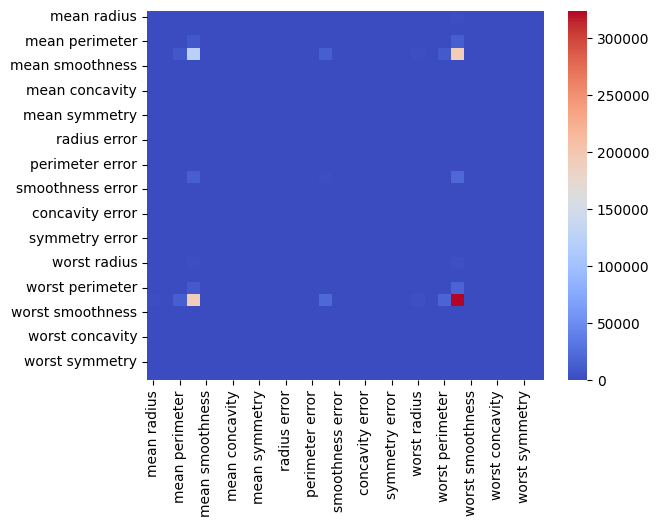

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()
cov_matrix = df.cov()
sns.heatmap(cov_matrix, cmap='coolwarm')
plt.show()

step 3

In [7]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import numpy as np

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

X = data.data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA().fit(X_scaled)
cum_var = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cum_var >= 0.95) + 1
pca = PCA(n_components=n_components).fit(X_scaled)
pca_features = [f"PCA_{i+1}" for i in range(n_components)]
df_pca = pd.DataFrame(pca, columns=pca_features)
df_pca.head()
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance vs Components')
plt.grid(True)
plt.show()

ValueError: DataFrame constructor not properly called!